### Exercice 3 : Dessiner

1. Créer une image noire de 128x128

2. Dessiner une ligne horizontale de 100 pixels de longueur

3. Dessiner une ligne oblique à 45°

4. Dessiner une ligne entre deux pixels dont on donnera les coordonnées

5. Dessiner une ligne oblique à 30°

6. Dessiner un rectangle sur la même image

7. Créer une image en dégradés de niveaux de gris

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 1. black image creation
black_image = np.zeros((128, 128), dtype=np.uint8)

# 2. horizontal line
for col in range(100):
    black_image[64, col] = 255

# 3. diagonal line and antidiagonal line(oblique=antidiagonal)
for i in range(128):
    black_image[i, (128 - 1) - i] = 255
for pixel in range(128):
    black_image[pixel, pixel] = 255

# 4. draw one line between 2 pixels with given coordinate points
pt1 = (10, 50)  # (x,y) = (col,row)
pt2 = (120, 20)
cv.line(black_image, pt1, pt2, 255, 1)  # I didn't know this. I looked it up



array([[255,   0,   0, ...,   0,   0, 255],
       [  0, 255,   0, ...,   0, 255,   0],
       [  0,   0, 255, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255,   0,   0],
       [  0, 255,   0, ...,   0, 255,   0],
       [255,   0,   0, ...,   0,   0, 255]], shape=(128, 128), dtype=uint8)

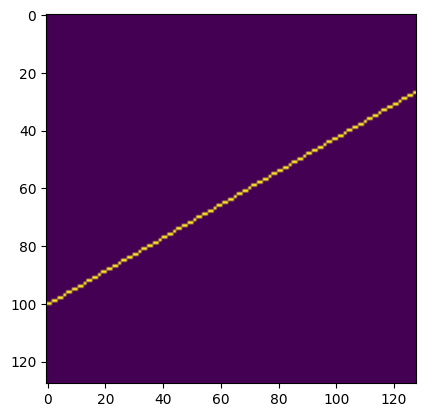

In [8]:
# 5. Dessiner une ligne oblique à 30°
import math

h, w = 128, 128
img_30deg = np.zeros((h, w), dtype=np.uint8)
center_x, center_y = 64, 64  # Let's draw from center

for x in range(w):
    # We shift x relative to center
    rel_x = x - center_x

    # y = tan(30) * x
    rel_y = rel_x * math.tan(math.radians(30))

    # Convert back to image coordinates
    y = int(center_y - rel_y)  # Minus because Y goes DOWN in images

    if 0 <= y < h:
        img_30deg[y, x] = 255
plt.imshow(img_30deg)

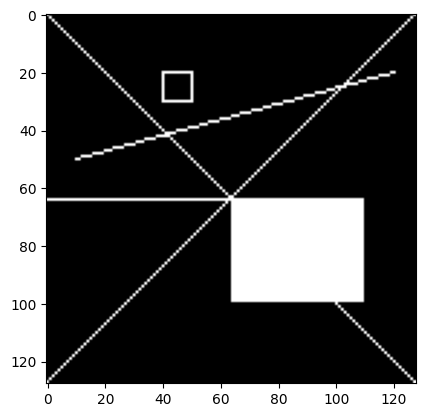

In [15]:
# 6. Dessiner un rectangle sur la même image
black_image[64:100, 64:110] = 255  # filled white
# square empty inside with four lines
# Left vertical
black_image[20:31, 40] = 255
# Bottom horizontal
black_image[30, 40:51] = 255
# Top horizontal
black_image[20, 40:51] = 255
# Right vertical
black_image[20:31, 50] = 255


plt.imshow(cv.cvtColor(black_image, cv.COLOR_BGR2RGB))

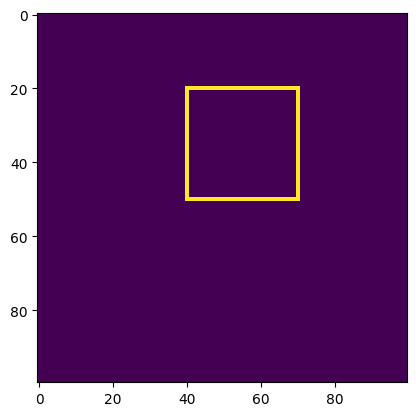

In [10]:
# use MASKING for drawing an empty rectangle

canvas = np.zeros((100, 100), dtype=np.uint8)
# coordinates
y, x = np.ogrid[:100, :100]

# the outer and inner boundaries
outer = (y >= 20) & (y <= 50) & (x >= 40) & (x <= 70)
inner = (y > 20) & (y < 50) & (x > 40) & (x < 70)

# border is outer AND NOT inner
border_mask = outer & ~inner

canvas[border_mask] = 255

plt.imshow(canvas)

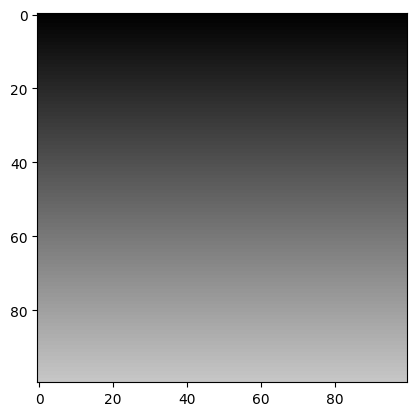

In [16]:
# 7. Créer une image en dégradés de niveaux de gris
# (Create a grayscale gradient image.)
def gradient():
    gradient_img = np.zeros((100, 100), dtype=np.uint8)

    for i in range(100):
        # gradient_img[:, i] = i * 2
        # gradient_img[i, :] = i * 2
        gradient_img[i, :] = i * 2

    return gradient_img


plt.imshow(cv.cvtColor(gradient(), cv.COLOR_BGR2RGB))

### Exercice 4 : Inversion aléatoire
1. Coder une fonction qui prend en entrée une image et qui retourne une inversion aléatoire des pixels de cette image. La fonction ne devra pas modifier l’image fournieen entrée mais créer une nouvelle image contenant cette inversion.

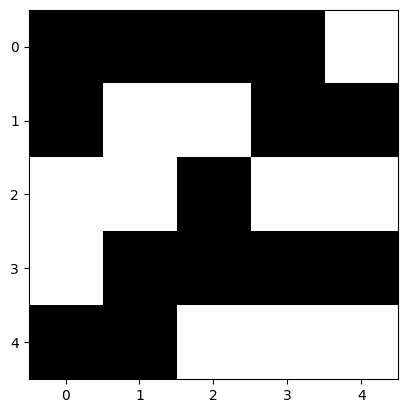

In [17]:
from random import random


def inverse_random_color(img):

    new_img = img.copy()
    h, w = new_img.shape[:2]  # why? explained bellow.

    # bad hard codded code:
    # for i in range(5):
    #     for j in range(5):
    #         if random() > 0.5:
    #             new_img[i, j] = 255 - new_img[i, j]

    # 1. Generate a random matrix of the same size (0.0 to 1.0)
    random_matrix = np.random.rand(h, w)

    # 2. Create a Boolean Mask (True where we want to invert)
    mask = random_matrix > 0.5

    # 3. Apply inversion ONLY where mask is True
    # If image is grayscale:
    if len(new_img.shape) == 2:
        new_img[mask] = 255 - new_img[mask]
    # If image is color, we need to be careful with broadcasting,
    # but for now let's assume grayscale for simplicity or apply to all channels.
    return new_img


normal_img = np.zeros((5, 5), dtype=np.uint8)
plt.imshow(cv.cvtColor(inverse_random_color(normal_img), cv.COLOR_BGR2RGB))

1. Understanding the Shape Tuple
When you call .shape on an image object, it returns a tuple. The contents of that tuple depend on whether the image is grayscale or color:

Grayscale Image: Returns (height, width). Length is 2.

Color Image (RGB/BGR): Returns (height, width, channels). Length is 3.

2. The Purpose of [:2]
The slice [:2] tells Python to take everything from index 0 up to (but not including) index 2.

If you have a color image with a shape of (1080, 1920, 3):

shape[0] is 1080 (Height).

shape[1] is 1920 (Width).

shape[2] is 3 (Channels/Colors).

By using [:2], you are effectively saying: "Give me the height and width, and ignore the color channels."

-----------------------------------------------------------


### Exercice 5 : Extrema d’une image
1. Coder une fonction qui prend en entrée une image et qui affiche les valeursminimales et maximales des niveaux de gris des pixels de l’image.

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

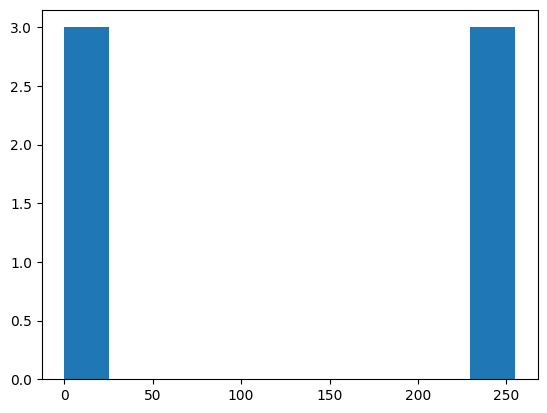

In [19]:
def show_max_min_graylevel(image):
    copy_image = image.copy()
    if len(copy_image.shape) < 3:
        gray = cv.split(copy_image)
        max_gray = np.max(gray)
        min_gray = np.min(gray)
        return max_gray, min_gray
    else:
        B,G,R = cv.split(copy_image)
        max_B = np.max(B)
        min_B = np.min(B)
        max_G = np.max(G)
        min_G = np.min(G)
        max_R = np.max(R)
        min_R = np.min(R)
        return max_B, min_B, max_G, min_G, max_R, min_R


image_5 = cv.imread("img/noidea.jpg")
show_max_min_graylevel(image_5)
plt.hist(show_max_min_graylevel(image_5))

# color = ('b','g','r') # Tuple of colors for the loop
# image_5 = cv.imread("../img/noidea.jpg")

# # Loop through B, G, R channels
# for i, col in enumerate(color):
#     # Calculate histogram using OpenCV (it's faster than matplotlib)
#     # cv.calcHist(images, channels, mask, histSize, ranges)
#     histr = cv.calcHist([image_5], [i], None, [256], [0, 256])
    
#     # Plot the line
#     plt.plot(histr, color=col)
#     plt.xlim([0, 256])

# plt.title("Color Histogram")
# plt.show()

### Exercice 6 : Couleur vers niveau de gris
1. Coder une fonction qui prend en entrée une image couleur et qui retourne unetransformée de cette image en niveaux de gris. 
- Pour un pixel $p(x,y)$ de couleur $(r,g,b)$,lui affecter le niveau de gris v où $v = (r + g + b)/3$.
- La fonction ne devra pas modifier

array([[138, 138, 138, ..., 152, 152, 153],
       [139, 138, 138, ..., 152, 152, 153],
       [139, 139, 139, ..., 153, 153, 153],
       ...,
       [167, 168, 171, ..., 144,  34,  23],
       [161, 160, 162, ...,  13,  23,  26],
       [158, 157, 159, ...,  24,  18,  21]], shape=(414, 625), dtype=uint8)

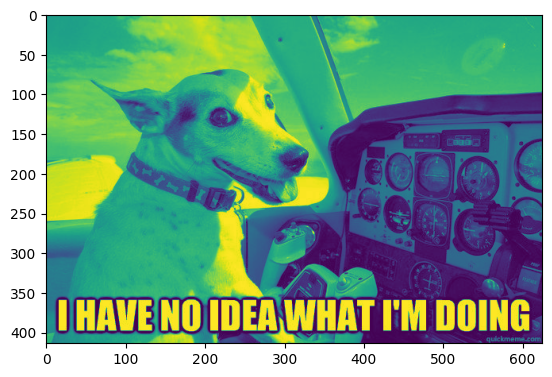

In [20]:
def transform_to_grayscale(image):
    B, G, R = cv.split(image)
    v = (B.astype(float) + G.astype(float) + R.astype(float)) / 3
    # Y = (0.114 * B) + (0.587 * G) + (0.299 * R)
    # return Y.astype(np.uint8)
    return v.astype(np.uint8)


noidea_img = cv.imread("img/noidea.jpg")
plt.imshow(transform_to_grayscale(noidea_img))
transform_to_grayscale(noidea_img)